In [ ]:
#### 0.1.1 - 2025 - 06 - 01
#### Dr. Marco Antonio Aceves
#### rev en Jupyter Notebook
#### Código como ejemplo como parte del libro:
#### de 0 a 100 en Inteligencia Artificial
#### 6_MLP Iris

In [3]:
# Clasificación de Iris con una Red Neuronal usando Neurolab
# Arquitectura: 4 -> 8 -> 4 -> 3 neuronas

import numpy as np          # Operaciones matemáticas con arrays
import pandas as pd         # Manipulación de datos (aunque aquí se usa poco)
import matplotlib.pyplot as plt  # Gráficos
import neurolab as nl       # Biblioteca para redes neuronales (ligera)
from sklearn.datasets import load_iris  # Dataset de iris
from sklearn.model_selection import train_test_split  # Dividir datos
from sklearn.preprocessing import MinMaxScaler  # Normalizar datos 0-1
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns       # Gráficos más bonitos =)

# Configurar numpy para reproducibilidad
np.random.seed(42)

In [4]:
print("=" * 50)
print("CLASIFICACIÓN DE IRIS CON NEUROLAB")
print("Arquitectura: 4 → 8 → 4 → 3 neuronas")
print("=" * 50)

# CARGAR DATOS
print("\n1. Cargando datos...")
iris = load_iris()
X = iris.data
y = iris.target

print(f"Forma de X: {X.shape}")
print(f"Forma de y: {y.shape}")
print(f"Clases: {iris.target_names}")

# PREPARAR DATOS
print("\n2. Preparando datos...")

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Normalizar datos (Neurolab requiere valores entre 0 y 1)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir etiquetas a formato one-hot para Neurolab
def to_onehot(labels, num_classes=3):
    onehot = np.zeros((len(labels), num_classes))
    for i, label in enumerate(labels):
        onehot[i, label] = 1
    return onehot

y_train_onehot = to_onehot(y_train)
y_test_onehot = to_onehot(y_test)

print(f"Datos entrenamiento: {X_train_scaled.shape}")
print(f"Datos prueba: {X_test_scaled.shape}")
print(f"Etiquetas one-hot: {y_train_onehot.shape}")


CLASIFICACIÓN DE IRIS CON NEUROLAB
Arquitectura: 4 → 8 → 4 → 3 neuronas

1. Cargando datos...
Forma de X: (150, 4)
Forma de y: (150,)
Clases: ['setosa' 'versicolor' 'virginica']

2. Preparando datos...
Datos entrenamiento: (120, 4)
Datos prueba: (30, 4)
Etiquetas one-hot: (120, 3)


In [7]:
# CREAR RED NEURONAL
print("\n3. Creando red neuronal...")

# Definir rangos de entrada (min y max para cada característica)
input_ranges = [[0, 1] for _ in range(4)]  # 4 características normalizadas

# Crear red neuronal con arquitectura específica: 4 -> 8 -> 4 -> 3
net = nl.net.newff(input_ranges, [8, 4, 3])

print("Red neuronal creada:")
print(f"- Capa entrada: 4 neuronas")
print(f"- Capa oculta 1: 8 neuronas")
print(f"- Capa oculta 2: 4 neuronas")
print(f"- Capa salida: 3 neuronas")
print(f"- Total capas: {len(net.layers)}")

# ENTRENAR RED NEURONAL
print("\n4. Entrenando red neuronal...")
print("Iniciando entrenamiento...")

# Configurar parámetros de entrenamiento
net.trainf = nl.train.train_bfgs  # Algoritmo de entrenamiento
error = net.train(X_train_scaled, y_train_onehot, epochs=100, show=20, goal=0.01)

print(f"Entrenamiento completado")
print(f"Error final: {error[-1]:.6f}")


3. Creando red neuronal...
Red neuronal creada:
- Capa entrada: 4 neuronas
- Capa oculta 1: 8 neuronas
- Capa oculta 2: 4 neuronas
- Capa salida: 3 neuronas
- Total capas: 3

4. Entrenando red neuronal...
Iniciando entrenamiento...
Epoch: 20; Error: 22.869423167825552;
Epoch: 40; Error: 2.2817818355451602;
Epoch: 60; Error: 1.0759309075528953;
Epoch: 80; Error: 0.9881615108825395;
Epoch: 100; Error: 0.9878504592521601;
The maximum number of train epochs is reached
Entrenamiento completado
Error final: 0.987850



5. Visualizando entrenamiento...


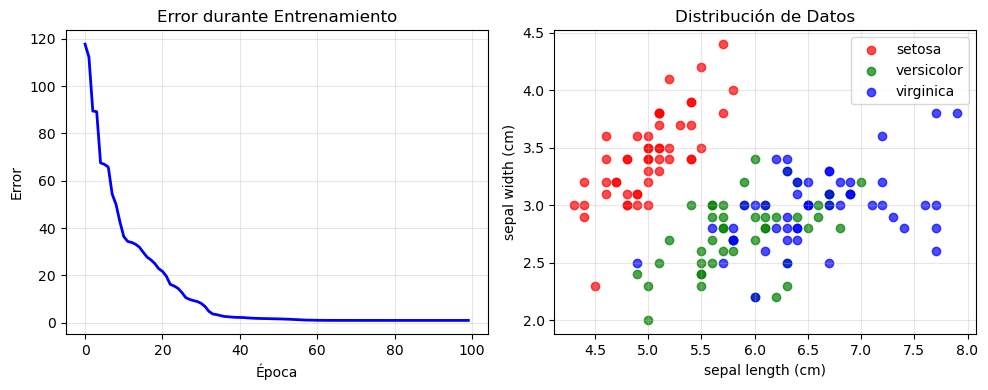

In [8]:
# VISUALIZAR ENTRENAMIENTO
print("\n5. Visualizando entrenamiento...")

plt.figure(figsize=(10, 4))

# Gráfico de error
plt.subplot(1, 2, 1)
plt.plot(error, 'b-', linewidth=2)
plt.title('Error durante Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Error')
plt.grid(True, alpha=0.3)

# Gráfico simple de datos
plt.subplot(1, 2, 2)
colors = ['red', 'green', 'blue']
for i in range(3):
    mask = y == i
    plt.scatter(X[mask, 0], X[mask, 1], 
               c=colors[i], label=iris.target_names[i], alpha=0.7)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Distribución de Datos')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


6. Evaluando modelo...
Precisión entrenamiento: 0.9917
Precisión prueba: 0.9667

7. Matriz de confusión...


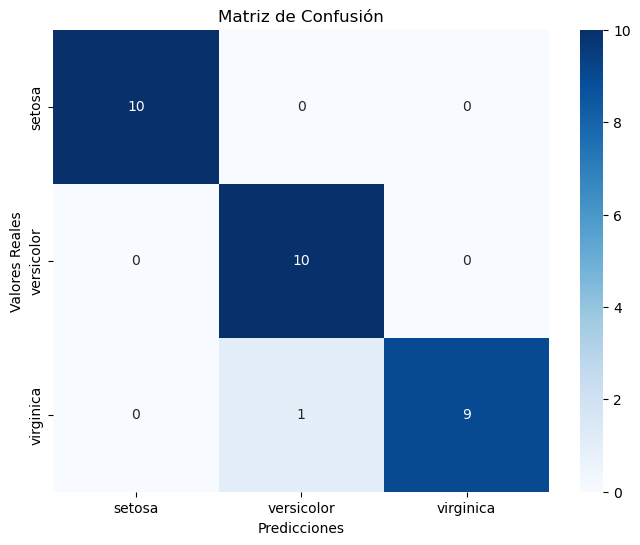


Reporte de clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


8. Análisis de predicciones...
Ejemplos de predicciones:
Real: setosa     | Pred: setosa     | Confianza: 1.000
Real: virginica  | Pred: virginica  | Confianza: 1.000
Real: versicolor | Pred: versicolor | Confianza: 1.000
Real: versicolor | Pred: versicolor | Confianza: 1.000
Real: setosa     | Pred: setosa     | Confianza: 1.000
Real: versicolor | Pred: versicolor | Confianza: 1.000
Real: setosa     | Pred: setosa     | Confianza: 1.000
Real: setosa     | Pred: setosa     | Confianza: 1.000
Real: virginica  | Pred: virginica  | Confianza: 1.000
Real: versicolor | Pred: versicolor | C

In [9]:
# HACER PREDICCIONES
print("\n6. Evaluando modelo...")

# Predicciones en conjunto de entrenamiento
y_train_pred_raw = net.sim(X_train_scaled)
y_train_pred = np.argmax(y_train_pred_raw, axis=1)

# Predicciones en conjunto de prueba
y_test_pred_raw = net.sim(X_test_scaled)
y_test_pred = np.argmax(y_test_pred_raw, axis=1)

# Calcular precisiones
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Precisión entrenamiento: {train_accuracy:.4f}")
print(f"Precisión prueba: {test_accuracy:.4f}")

# MATRIZ DE CONFUSIÓN
print("\n7. Matriz de confusión...")

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title('Matriz de Confusión')
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')
plt.show()

# Reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_test_pred, target_names=iris.target_names))

# ANÁLISIS DE PREDICCIONES
print("\n8. Análisis de predicciones...")

# Mostrar algunas predicciones con confianza
print("Ejemplos de predicciones:")
for i in range(min(10, len(y_test))):
    real_class = iris.target_names[y_test[i]]
    pred_class = iris.target_names[y_test_pred[i]]
    confidence = np.max(y_test_pred_raw[i])
    print(f"Real: {real_class:10} | Pred: {pred_class:10} | Confianza: {confidence:.3f}")

# FUNCIÓN PARA NUEVAS PREDICCIONES
def predecir_iris(sepal_length, sepal_width, petal_length, petal_width):
    """
    Predice especie de iris con las características dadas
    """
    # Preparar entrada
    nueva_muestra = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
    nueva_muestra_scaled = scaler.transform(nueva_muestra)
    
    # Hacer predicción
    pred_raw = net.sim(nueva_muestra_scaled)[0]
    pred_class = np.argmax(pred_raw)
    especie = iris.target_names[pred_class]
    confianza = pred_raw[pred_class]
    
    print(f"\nCaracterísticas: [{sepal_length}, {sepal_width}, {petal_length}, {petal_width}]")
    print(f"Predicción: {especie}")
    print(f"Confianza: {confianza:.3f}")
    print("Probabilidades:")
    for i, nombre in enumerate(iris.target_names):
        print(f"  {nombre}: {pred_raw[i]:.3f}")
    
    return especie, pred_raw

# EJEMPLOS DE USO
print("\n10. Ejemplos de predicción...")

print("\nEjemplo 1 - Setosa típica:")
predecir_iris(5.1, 3.5, 1.4, 0.2)

print("\nEjemplo 2 - Versicolor típica:")
predecir_iris(6.2, 2.9, 4.3, 1.3)

print("\nEjemplo 3 - Virginica típica:")
predecir_iris(6.5, 3.0, 5.8, 2.2)

# ESTADÍSTICAS FINALES
print("\n" + "=" * 50)
print("RESUMEN FINAL")
print("=" * 50)
print(f"Arquitectura: 4 → 8 → 4 → 3 neuronas")
print(f"Algoritmo: {net.trainf.__name__}")
print(f"Épocas entrenamiento: {len(error)}")
print(f"Error final: {error[-1]:.6f}")
print(f"Precisión entrenamiento: {train_accuracy:.4f}")
print(f"Precisión prueba: {test_accuracy:.4f}")
print("=" * 50)


In [10]:
# GUARDAR MODELO (opcional)
print("\n12. Guardando modelo...")
try:
    # Guardar red neuronal
    net.save('modelo_iris_neurolab.net')
    print("Modelo guardado como 'modelo_iris_neurolab.net'")
    
    # Guardar escalador
    import pickle
    with open('escalador_iris.pkl', 'wb') as f:
        pickle.dump(scaler, f)
    print("Escalador guardado como 'escalador_iris.pkl'")
    
except Exception as e:
    print(f"No se pudo guardar: {e}")
    print("(Esto es normal, continúa sin problemas)")

print("\n¡Clasificación completada exitosamente!")


12. Guardando modelo...
Modelo guardado como 'modelo_iris_neurolab.net'
Escalador guardado como 'escalador_iris.pkl'

¡Clasificación completada exitosamente!
